In [3]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
LIST_OF_CHANNEL_IDS = [
"UCsDmESjqNPukDmVnuneLrqw",
"UCY6Ij8zOds0WJEeqCLOnqOQ",
"UClN24S5-fc7LD0JJW0FdGWw",
"UC3iNdSV_RQU7DHTGpqEW96w",
"UC_52i6mlrzOZs_NEuSepzAg",
"UCr3cBLTYmIK9kY0F_OdFWFQ",
"UCV6g95OBbVtFmN9uiJzkFqQ",
"UCgCKYs56-LKEPGQ99DzqQOg",
"UCOwxx9VnEnlFKt5EB70KTzQ",
"UC2Ds30pkifFVD0CE08wF50g",
"UC7UGbBVrqLlq6CRxWWUmyKw",
"UCn1XB-jvmd9fXMzhiA6IR0w",
"UCFeqAfEuKm7lIg2ddQzh61A",
"UCAlxwHEm1bWWYoe5VCSQYEg",
"UCz7iJPVTBGX6DNO1RNI2Fcg",
"UCOAUz4d1NUNxSHh_SOJtdGQ",
"UCGGTAB19HlHEWPwwmxHsEKA",
"UCOsATJw-IZgqGT8MFrHjKGg",
"UCsKVP_4zQ877TEiH_Ih5yDQ",
"UCOinp9hALPUcZeoL3Kmaviw",
"UCGwu0nbY2wSkW8N-cghnLpA",
"UCu6v4AdYxVH5fhfq9mi5llA",
"UCj74rJ9Lgl3WTngq675wxKg",
"UCNIuvl7V8zACPpTmmNIqP2A",
"UCo8bcnLyZH8tBIH9V1mLgqQ",
"UCR0O-1cvuPNxDosvSDLpWHg",
"UCvUmwreRrbxeR1mbmojj8fg",
"UCUKi4zY5ETSqrKAjTBgjM-g",
"UCDQBZcjYKP1J1Nu-Y0_D37Q",
"UCQ9HvHH-KRYHI5ynj2kbLwQ",
"UCRfg0SWjIHm_h95e4V8X5og",
"UCWPB0WpnMIy-g7zncwIhvQg",
"UCC-slLJZ4p4HOznMUcFn_2g",
"UCj6CFdE3LSddaoszxq604TQ",
"UCXrtqz4fqf-OUEVpp2A1W0w",
"UChUg_Sd5i74SFoZH2XvagwQ",
"UC2hm5rD_IrfYRMfq5YQudgA",
"UC_nEHeUEVNY5ZYLRWg8KoZQ",
"UCrlzgjrKUa3AlrfSZTBG2fg",
"UCupWnlhB3PMW1w0CLfLCfug",
"UCsW0LA-ThH18OCrT9pa2zfQ",
"UCG-O5k7KKNPABULS20_MAMA",
"UCepPGz8AVCbggMl3BvboaBA",
"UCP21EOiKAkCGjv6kqS6UsZw",
"UC9z7EZAbkphEMg0SP7rw44A",
"UCZft8Ol-dMtguwam7bWItnw",
"UCYaxncRvOBu-vtdhxf6qciA",
"UCte3qx7A5OWTPSnNjV4oheg",
"UCRei8TBpt4r0WPZ7MkiKmVg",
"UC6bXfhbiX1PsSi_-pdQeHjg",
"UC_7lgWbCA_HZQkaxmmQgNoA",
"UCQO_C1sfUCpUzzV-gxQ-lxA",
"UCHw-JjzU80GKrGJwI1Uf1OQ",
"UCDEaY2XwwfKomQAJgGfehWw",
"UCI-92EMS3ZJ11gz-S_oyaSA",
"UC7Mk9RmlKT_x8FAsMOJn1cg",
#====
"UCnsem444vdU1HhS0mb2wwTA",
"UCnbtlei4RJMHWSUq4LKn_SQ", 
"UC9i7x4EzTBlNvslu1wWEB8Q",
"UC1nM46_BMKq4vd4jmd6iMHA",
"UCMNxwlfY6P5Rm40QOp8Hqsg",
"UCgmublDj4T0zEP7ngRRGkmg"
]
print(len(LIST_OF_CHANNEL_IDS), "channels to analyze")

62 channels to analyze


So I get the list of videos that a channel has. I don't yet have the specifics (aka metadata) on the videos yet because this API does not give me the information. What I have to do is filter this information to get a list of videos I need to throw at a different API to get the metadata. 

In [19]:
df = pd.read_json (r'searchListResponse.json')
channelIdToListOfVids = {} #channelId: []vids
listOfVidIds = []
#initialize the dicts

for channelId in LIST_OF_CHANNEL_IDS:
    channelIdToListOfVids[channelId] = []

count= 0

for index, row in df.iterrows():  
    listOfLists = df.iat[index, row.index.get_loc(row.first_valid_index())]
    for indList in listOfLists:
        for item in indList['items']:
            channelId = item['snippet']['channelId']
            if 'videoId' in item['id'].keys():
                snippet=item['snippet']
                vidId = item['id']['videoId']
                publishTime = snippet['publishTime']
                vidTitle = snippet['title']
                vidDesc = snippet['description']

                vidInfo = {'vidId' : vidId,
                'publishTime': publishTime,
                'vidTitle': vidTitle}
                channelIdToListOfVids[channelId].append(vidInfo)
                listOfVidIds.append(vidId)
                count+=1

print(len(channelIdToListOfVids.keys()), " keys detected")
vidCont=0
for i in channelIdToListOfVids.keys():
    vidCont+=len(channelIdToListOfVids[i])
print(count, " videos detected")
channelIdToListOfVids
df

62  keys detected
5224  videos detected


,UCnsem444vdU1HhS0mb2wwTA,UCnbtlei4RJMHWSUq4LKn_SQ,UC9i7x4EzTBlNvslu1wWEB8Q,UC1nM46_BMKq4vd4jmd6iMHA,UCMNxwlfY6P5Rm40QOp8Hqsg,UCsDmESjqNPukDmVnuneLrqw,UCY6Ij8zOds0WJEeqCLOnqOQ,UClN24S5-fc7LD0JJW0FdGWw,UC3iNdSV_RQU7DHTGpqEW96w,UC_52i6mlrzOZs_NEuSepzAg,...,UCte3qx7A5OWTPSnNjV4oheg,UCRei8TBpt4r0WPZ7MkiKmVg,UC6bXfhbiX1PsSi_-pdQeHjg,UC_7lgWbCA_HZQkaxmmQgNoA,UCQO_C1sfUCpUzzV-gxQ-lxA,UCHw-JjzU80GKrGJwI1Uf1OQ,UCDEaY2XwwfKomQAJgGfehWw,UCI-92EMS3ZJ11gz-S_oyaSA,UC7Mk9RmlKT_x8FAsMOJn1cg,UCgmublDj4T0zEP7ngRRGkmg
0,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN
61,NaN,NaN,"[{'kind': 'youtube#searchListResponse', 'etag'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# with open('listOfVideoIds.json', 'w') as outfile:
#     json.dump(listOfVidIds, outfile)

We now have the list of videoIds for each channel

After using this information in `main.py` to shoot at the API to get individual video metadata, I again filter out information specific to each video.

In [21]:
df = pd.read_json (r'videoListResponse.json')
backend_purposes= {}

def flattenList(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list
    
for channelId in LIST_OF_CHANNEL_IDS:
    backend_purposes[channelId]=[]

matching_vidId_to_info={}
count = 0
debugMsg = []
setOfTypes = []
for index, indList in df.iterrows():
    items = indList['items']
    for item in items:
        count+=1
        vidId = item['id']
        channelId = item['snippet']['channelId']
        contentDetails= item['contentDetails']
        duration= contentDetails['duration']
        statistics = item['statistics']
        viewCount = statistics['viewCount']
        likeCount = statistics.get('likeCount')
        commentCount = statistics.get('commentCount')
        description = item['snippet']['description']
        if (likeCount == None or commentCount == None):
            print(vidId, "has", "likes" if likeCount == None else '', "comments" if commentCount == None else '', "disabled")
        topicCategories = []
        if item.get('topicDetails') != None:
            topicCategories = item.get('topicDetails').get('topicCategories')
            setOfTypes.append([i for i in topicCategories])
        if True not in ['music' in strng.lower() for strng in topicCategories] or item.get('topicDetails') == None: #all videos that are not music-typed or just don't have a type
            matching_vidId_to_info[vidId] = {'duration': duration,
                            'viewCount': int(-1 if viewCount is None else viewCount),
                            'likeCount': int(-1 if likeCount is None else likeCount),
                            'commentCount': int(-1 if commentCount is None else commentCount),
                            'topicCategories': topicCategories,
                            'description': description}
            backend_purposes[channelId].append(vidId)
        else: #all videos that are music-typed
            debugMsg.append(vidId)

vidIdsCollected =0 
for i in backend_purposes.keys():
    vidIdsCollected += len(backend_purposes[i])
print(vidIdsCollected, " videos to run semantic analysis on")
print(set(flattenList(setOfTypes)))
print("There were ", count-len(matching_vidId_to_info), " videos categorized as music-videos")
df.head()

QQilWUln3F8 has  comments disabled
0eCXTYobXQk has  comments disabled
hpQQohcHk9Q has  comments disabled
fV15ba-dpPI has  comments disabled
Cb6F14AGrvI has  comments disabled
OmpK2tkKmNQ has likes  disabled
SuApY0sEvz4 has  comments disabled
XJcM__haurU has  comments disabled
BMf9QEg3F-I has  comments disabled
LcyCs7fRmgc has  comments disabled
J10KDPg_Im0 has  comments disabled
7ghz_npkbmE has  comments disabled
JkGZ2Hl1l8c has  comments disabled
7CjAIbmZZGY has  comments disabled
bNMtxQnnuaA has  comments disabled
RlU32AfEVeU has likes  disabled
5037  videos to run semantic analysis on
{'https://en.wikipedia.org/wiki/Television_program', 'https://en.wikipedia.org/wiki/Vehicle', 'https://en.wikipedia.org/wiki/Soul_music', 'https://en.wikipedia.org/wiki/Music', 'https://en.wikipedia.org/wiki/Knowledge', 'https://en.wikipedia.org/wiki/Hobby', 'https://en.wikipedia.org/wiki/Rhythm_and_blues', 'https://en.wikipedia.org/wiki/Classical_music', 'https://en.wikipedia.org/wiki/Fashion', 'https

,kind,etag,items,pageInfo
0,youtube#videoListResponse,uihAK9XOb20ZMPAhyaOl3RlzxtM,"[{'kind': 'youtube#video', 'etag': 'gyYBtfDbC6...","{'totalResults': 50, 'resultsPerPage': 50}"
1,youtube#videoListResponse,3aVxIecKBk-9vNk69yhO9c-vvAw,"[{'kind': 'youtube#video', 'etag': 'xrTMrq3CmH...","{'totalResults': 50, 'resultsPerPage': 50}"
2,youtube#videoListResponse,oqZRkDSIFkHS_Dp55C-nLtyTLwc,"[{'kind': 'youtube#video', 'etag': 'lh7jNYD8ad...","{'totalResults': 50, 'resultsPerPage': 50}"
3,youtube#videoListResponse,tjecSLlBxgVHs0Azc6qKUd2P7AI,"[{'kind': 'youtube#video', 'etag': '0gDasbT46d...","{'totalResults': 50, 'resultsPerPage': 50}"
4,youtube#videoListResponse,UFeabLiGm4bJbeEeLhtsiSipWwk,"[{'kind': 'youtube#video', 'etag': 'jrRd2t92yo...","{'totalResults': 50, 'resultsPerPage': 50}"


In [22]:
#deepcopy
channelIdToListOfVids_copy = json.loads(json.dumps(channelIdToListOfVids))
debugMsg = []
for channelId in LIST_OF_CHANNEL_IDS:
    listOfVideosForEachChannel = channelIdToListOfVids_copy[channelId]
    for video in listOfVideosForEachChannel:
        additionalVideoMetadata= matching_vidId_to_info.get(video['vidId'])
        if additionalVideoMetadata:
            video.update(additionalVideoMetadata)
        else:
            debugMsg.append(video['vidId'])

print(sum(len(channelIdToListOfVids_copy[channelId]) for channelId in LIST_OF_CHANNEL_IDS), "total videos")
print(len(debugMsg), "do not have videoIds because they're not videos- some are affiliated channels.")
#some of these vids are private, duplicates. 

5224 total videos
187 do not have videoIds because they're not videos- some are affiliated channels.


In [23]:
REFERENCE_UTC_TIME_FOR_PUBLISH = datetime(2021, 12, 24, 5, 2, 59, 166993)
channelId_to_earliestVideoTimestamp_and_mostViewedVideo = {} # {channelId: {firstVideoTimestamp: <>, mostViewedVideoInfo: {}}}

#channelId_to_representative_vid_and_first_vid
for channelId in LIST_OF_CHANNEL_IDS:
    listOfVideoInfo = channelIdToListOfVids_copy[channelId]
    df = pd.DataFrame(list(listOfVideoInfo))
    mostViewedVideoIndex = df['viewCount'].idxmax()
    earliestVideoTimestamp = min(df['publishTime'])
    firstUploadDate = earliestVideoTimestamp
    daysLiveSinceFirstUpload = pd.Timedelta(REFERENCE_UTC_TIME_FOR_PUBLISH - datetime.strptime(earliestVideoTimestamp, '%Y-%m-%d'+'T'+'%H:%M:%S'+'Z')).round('d')
    channelId_to_earliestVideoTimestamp_and_mostViewedVideo[channelId] = {'firstUploadDate': firstUploadDate, 'daysSinceFirstVideo': daysLiveSinceFirstUpload, 'mostViewedVideo': df.iloc[mostViewedVideoIndex].to_dict()}

And now, I update the dictionary of each video specified by vidId, to update the video information with more metadata. Not only does the video info contain `vid publishedAt`, `publishTime`, `vidTitle`, and `vidDescription`, but it also contains `duration`, `viewCount`, `likeCount`, `commentCount`, and `topicCategories`

In [24]:
# with open('masterSheetOfChannelIdToListOfVidInfos.json', 'w') as outfile:
#     json.dump(channelIdToListOfVids_copy, outfile)

channelIdToListOfVidIds = {}
for channelId in LIST_OF_CHANNEL_IDS:
    vidInfoList = channelIdToListOfVids_copy[channelId]
    channelIdToListOfVidIds[channelId] = []
    for vidInfo in vidInfoList:
        channelIdToListOfVidIds[channelId].append(vidInfo['vidId'])

# with open('masterSheetOfChannelIdToListOfVidIds.json', 'w') as outfile:
#     json.dump(channelIdToListOfVidIds, outfile)

If I had a lot of resources like an actual GPU and memory, I'd probably analyze all the videos to find the average video to be representative of the channel, but since I don't, I want to take the most viewed video of each channel. This is a decision I made based on the... untestable hypothesis that the most-viewed video is the one that brought the channel the most subscriber count out of all of them. 

So I think taking the most-viewed video to represent the channel is an acceptable alternative. Thus, I will begin searching for 
1. the most viewed video by searching for `max(viewcount)` for each Channel
2. the first uploaded video by searching for `min(publishedAt)` for each channel because I need those stats as well. 

The result I get should be something along the lines of: `{ChannelId: 'xyz', earliestVideoPublishedDate: 'DateTime', mostViewedVideo : {vidInfo dictionary}}`

In [25]:
df = pd.DataFrame(list(listOfVideoInfo)) 
count=0
listOfVideoMetaData = []
for channelId in LIST_OF_CHANNEL_IDS:
    listOfVideoMetaData += channelIdToListOfVids_copy[channelId]
    count+=len(channelIdToListOfVids_copy[channelId])
print(count)
# pd.DataFrame(listOfVideoMetaData).to_csv("vidIds_metaData.csv")

5224


So... creating a dataframe out of the info is quite trivial. Really easy. I also just noticed that some of these youtube channels are going to have music videos... which is not in the scope of my project right now. Gonna have to remove any videos with topicCategories of music themes.

In [26]:
REFERENCE_UTC_TIME_FOR_PUBLISH = datetime(2021, 12, 24, 5, 2, 59, 166993)
channelId_to_earliestVideoTimestamp_and_mostViewedVideo = {} # {channelId: {firstVideoTimestamp: <>, mostViewedVideoInfo: {}}}

#channelId_to_representative_vid_and_first_vid
for channelId in LIST_OF_CHANNEL_IDS:
    listOfVideoInfo = channelIdToListOfVids_copy[channelId]
    df = pd.DataFrame(list(listOfVideoInfo))
    mostViewedVideoIndex = df['viewCount'].idxmax()
    earliestVideoTimestamp = min(df['publishTime'])
    firstUploadDate = earliestVideoTimestamp
    daysLiveSinceFirstUpload = pd.Timedelta(REFERENCE_UTC_TIME_FOR_PUBLISH - datetime.strptime(earliestVideoTimestamp, '%Y-%m-%d'+'T'+'%H:%M:%S'+'Z')).round('d')
    channelId_to_earliestVideoTimestamp_and_mostViewedVideo[channelId] = {'firstUploadDate': firstUploadDate, 'daysSinceFirstVideo': daysLiveSinceFirstUpload, 'mostViewedVideo': df.iloc[mostViewedVideoIndex].to_dict()}
channelId_to_earliestVideoTimestamp_and_mostViewedVideo

{'UCsDmESjqNPukDmVnuneLrqw': {'firstUploadDate': '2009-12-07T21:13:28Z',
  'daysSinceFirstVideo': Timedelta('4399 days 00:00:00'),
  'mostViewedVideo': {'vidId': 'EcgkRp2IUsc',
   'publishTime': '2017-10-26T01:05:22Z',
   'vidTitle': 'My Hot Babysitter Got Me In Trouble',
   'duration': 'PT6M30S',
   'viewCount': 35960829.0,
   'likeCount': 840561.0,
   'commentCount': 75550.0,
   'topicCategories': ['https://en.wikipedia.org/wiki/Entertainment',
    'https://en.wikipedia.org/wiki/Film'],
   'description': "First Name Babysitter. Last Name Trouble. \nGET T-SHIRTS: http://www.itsalexclark.com \nSEE ME ON TOUR: http://www.itsalexclark.com/tour\n\nThanks to Shgurr and PamonSunset:\nhttps://www.youtube.com/channel/UCkQ3eqNNaFrBZ_WbnCIMN8w\n\nSubscribe: http://bit.ly/SubAlexClark | Get ItsAlexClark merch: http://itsalexclark.bigcartel.com/ \nWatch my latest video: https://youtube.com/watch?v=YIiBGDBN-Po&list=PLmh1WGagp73Jbndkw6nCz2JCm73jEp8gh\nHelp out the channel: https://Patreon.com/itsal

In [27]:
def try_parsing_date(text):
    for fmt in ('%Y-%m-%d'+'T'+'%H:%M:%S'+'Z', '%Y-%m-%d'+'T'+'%H:%M.%S'+'Z'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            print(text)
            raise ValueError('no valid date format found')

In [32]:
#important. date ref is 12/24 because this is when I pulled this data. 

df = pd.read_json (r'channelListResponse.json')
REFERENCE_UTC_NOW= datetime(2021, 12, 24, 5, 2, 59, 166993)
channelInfo_master_df= pd.DataFrame()

for index, row in df.iterrows():
    items=df['items'][index][0]
    snippet = items['snippet']

    title=snippet['title']
    channelId=items['id']
    publishedAt=snippet['publishedAt']
    description=snippet['description']
    viewCount=items['statistics']['viewCount']
    subscriberCount=items['statistics']['subscriberCount']
    videoCount=items['statistics']['videoCount']
    daysLive = pd.Timedelta(REFERENCE_UTC_NOW - try_parsing_date(publishedAt)).round('d').days

    data = {'channelName':title, 
    'channelId': channelId, 
    'daysLiveAsOfLaunch': daysLive,
    'daysSinceFirstVideo': channelId_to_earliestVideoTimestamp_and_mostViewedVideo[channelId]['daysSinceFirstVideo'].days,
    'description': description,
    'viewCount': int(viewCount),
    'videoCount': int(videoCount),
    'mostPopularVideoId' : channelId_to_earliestVideoTimestamp_and_mostViewedVideo[channelId]['mostViewedVideo']['vidId'],
    'firstUploadDate' : channelId_to_earliestVideoTimestamp_and_mostViewedVideo[channelId]['firstUploadDate'],

    'subscriberCount': int(subscriberCount),
    'subscribersPerYearSinceFirstUpload' : float(int(subscriberCount)/(channelId_to_earliestVideoTimestamp_and_mostViewedVideo[channelId]['daysSinceFirstVideo'].days/365)),
    'viewCountPerYearSinceFirstUpload' : float(int(viewCount)/(channelId_to_earliestVideoTimestamp_and_mostViewedVideo[channelId]['daysSinceFirstVideo'].days/365)),
    }
    df_generated = pd.DataFrame(data, index=[index])
    channelInfo_master_df= channelInfo_master_df.append(df_generated)
len(channelInfo_master_df)

61

In [29]:
channelInfo_master_df.to_csv('channelInfo_master.csv')

In [30]:
# with open("channelHolisticInfo.json", 'w') as f:
#     json.dump(channelInfo_master_df.to_dict(), f)

In [31]:
%matplotlib widget

0.9571149518074998


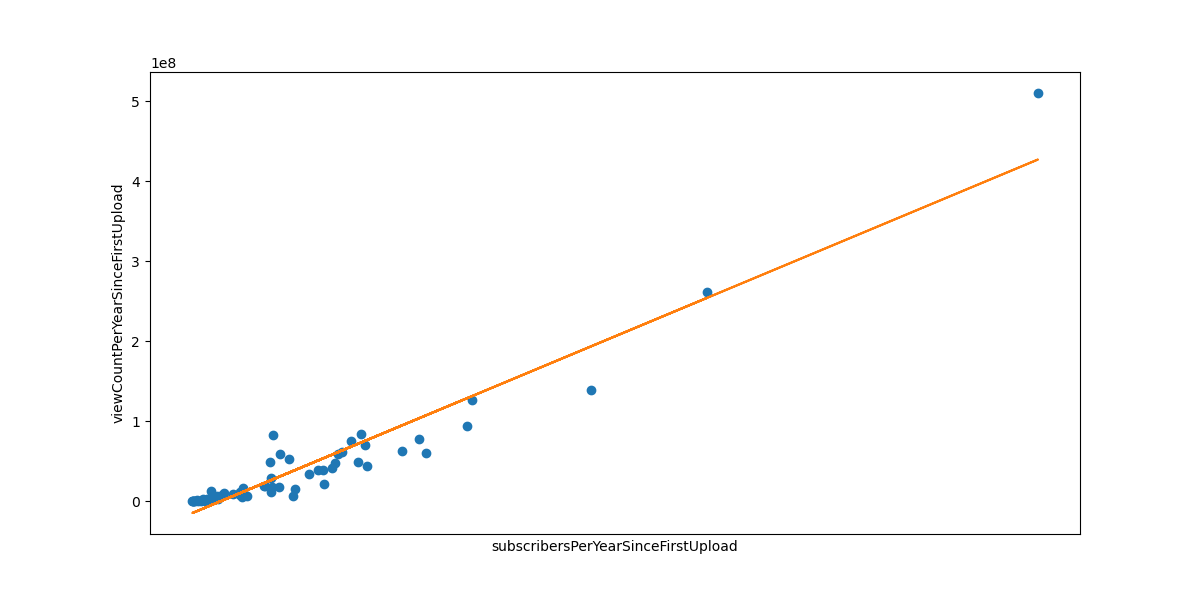

In [33]:
import mplcursors
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

x_name = "subscribersPerYearSinceFirstUpload"
y_name = "viewCountPerYearSinceFirstUpload"
tooltip_name = "channelName"
tt=channelInfo_master_df[tooltip_name]
x=channelInfo_master_df[x_name]
y=channelInfo_master_df[y_name]
zipped = zip(x, y)

# tt = df[tooltip_name]

fig, ax = plt.subplots(1, figsize=(12,6))
sc = ax.scatter(x, y)
# Plot the average line
avg_score= np.mean([i for i in y])
mean_x=np.arange(0,61,1)
mean_y=[avg_score for i in np.zeros_like(channelInfo_master_df['subscribersPerYearSinceFirstUpload'])]
mean_line = ax.plot(mean_x,mean_y, label='Mean', linestyle='--')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
cursor = mplcursors.cursor(sc, hover=True)
cursor.connect(
    "add", lambda sel: sel.annotation.set_text(tt[sel.index]))
plt.xlabel(x_name)
plt.ylabel(y_name)
# plt.show()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
result = scipy.stats.linregress(x, y)
print(result.rvalue)



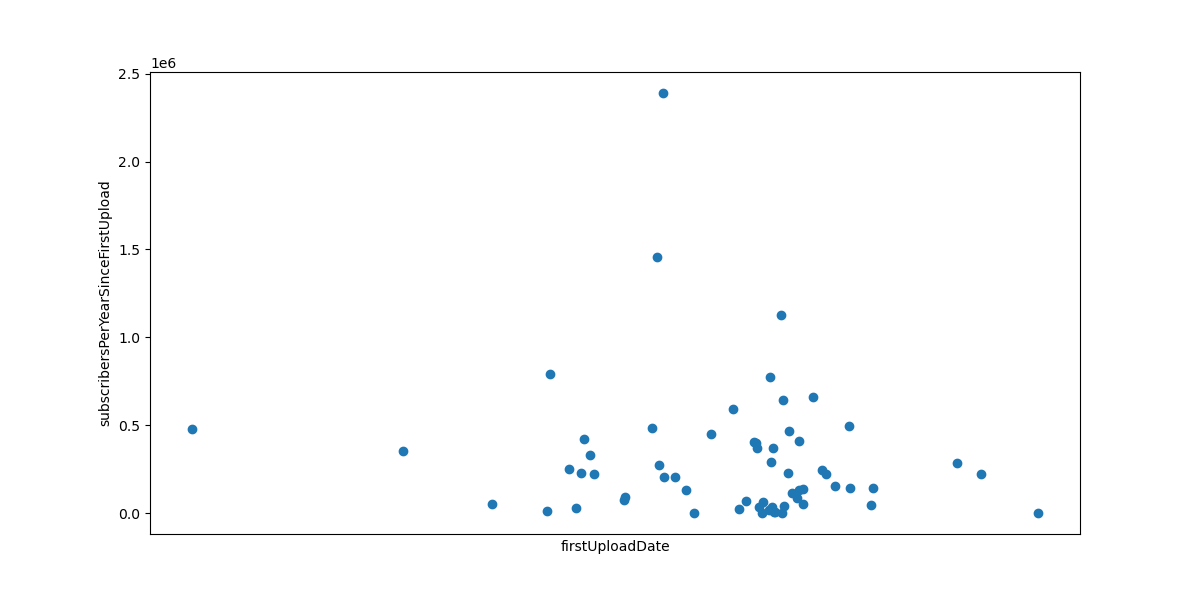

In [34]:
import mplcursors
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib.dates as mdates
import datetime as dt

y_name = "subscribersPerYearSinceFirstUpload"
x_name = "firstUploadDate"
tooltip_name = "channelName"
tt=channelInfo_master_df[tooltip_name]
x=[dt.datetime.strptime(d,'%Y-%m-%d'+'T'+'%H:%M:%S'+'Z').date() for d in channelInfo_master_df[x_name]]
y=channelInfo_master_df[y_name]

formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

fig, ax = plt.subplots(1, figsize=(12,6))
sc = ax.scatter(x, y)
ax = plt.gca()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
cursor = mplcursors.cursor(sc, hover=True)
cursor.connect(
    "add", lambda sel: sel.annotation.set_text('{}:{}'.format(tt[sel.index], x[sel.index])))
plt.xlabel(x_name)
plt.ylabel(y_name)

# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x + b)
# result = scipy.stats.linregress(x, y)
# print(result.rvalue)
plt.show()

`MostViewedVideoInfo` is showing up as NaN because it's of type `dict`. So need to just make sure I have access to the deets.

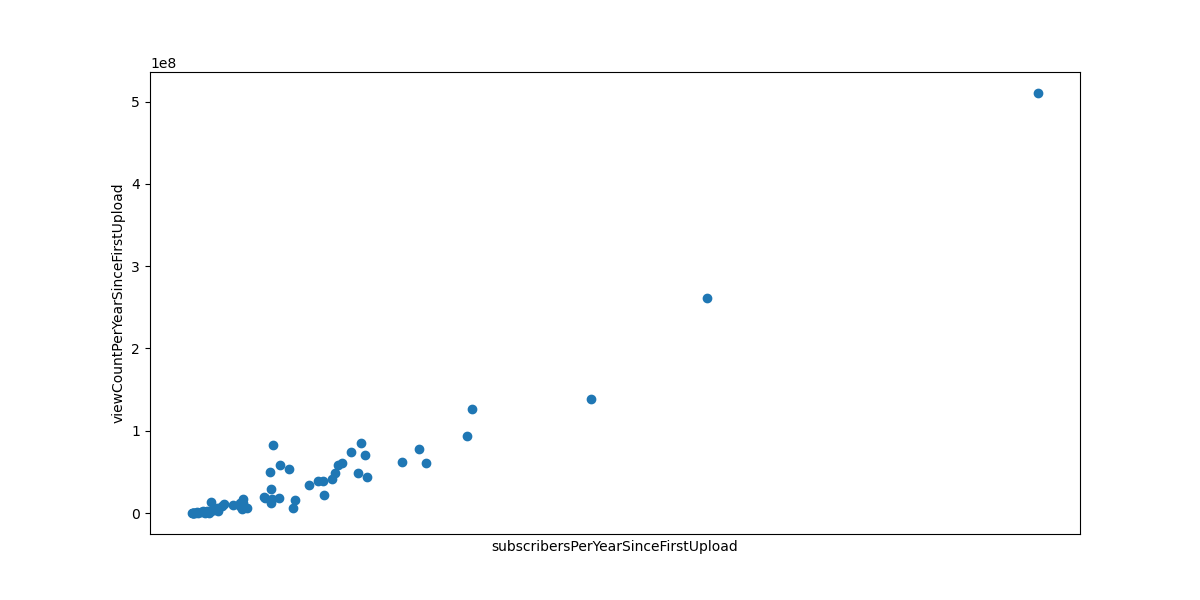

0.9571149518074998


In [35]:
import mplcursors
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

x_name = "subscribersPerYearSinceFirstUpload"
y_name = "viewCountPerYearSinceFirstUpload"
tooltip_name = "channelName"
tt=channelInfo_master_df[tooltip_name]
x=channelInfo_master_df[x_name]
y=channelInfo_master_df[y_name]
zipped = zip(x, y)

# tt = df[tooltip_name]

fig, ax = plt.subplots(1, figsize=(12,6))
sc = ax.scatter(x, y)
# Plot the average line
avg_score= np.mean([i for i in y])
mean_x=np.arange(0,61,1)
mean_y=[avg_score for i in np.zeros_like(channelInfo_master_df['subscribersPerYearSinceFirstUpload'])]
mean_line = ax.plot(mean_x,mean_y, label='Mean', linestyle='--')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
cursor = mplcursors.cursor(sc, hover=True)
cursor.connect(
    "add", lambda sel: sel.annotation.set_text(tt[sel.index]))
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
result = scipy.stats.linregress(x, y)
print(result.rvalue)

So I need to remove... all the music-themed game letsplay stuff. And I did. All the way up there.

Whew. And now... I need to gather the transcripts for the 33 videos above to run semantic analysis on it. There's probably an API for it...

In [36]:
# channelId_to_mostViewedVidId = {}

# for channelId in LIST_OF_CHANNEL_IDS:
#     mostViewedVidId = mostViewedVideo_master_dict[channelId]['vidId']
#     channelId_to_mostViewedVidId[channelId] = mostViewedVidId

# with open('channelId_to_mostViewedVidId.json', 'w') as outfile:
#     json.dump(channelId_to_mostViewedVidId, outfile)

with open('channelId_to_mostViewedVidId.json') as input:
    mostViewedVideo_master_dict = json.load(input)

update schedule

In [37]:
with open('masterSheetOfChannelIdToListOfVidInfos.json') as input:
    masterSheetOfChannelIdToListOfVidInfos = json.load(input)

In [38]:
import regex as re
import isodate

def getTime(timestamp):
    return datetime.strptime(timestamp, '%Y-%m-%d'+'T'+'%H:%M:%S'+'Z')

channelId_to_publishFrequency = {}
channelId_to_duration = {}
for channelId in LIST_OF_CHANNEL_IDS:
    
    durations=[]
    publishDates=[]
    for vidInfo in masterSheetOfChannelIdToListOfVidInfos[channelId]:
        if vidInfo.get('duration') != None:
            durations.append(isodate.parse_duration(vidInfo.get('duration')).total_seconds())
        if vidInfo.get('publishTime')!= None:
            publishDates.append(vidInfo.get('publishTime'))
    channelId_to_duration[channelId] = {'duration': sorted(durations)}
    channelId_to_publishFrequency[channelId] = {'publishDates': sorted(publishDates)}

In [39]:
import numpy as np
for channelId in LIST_OF_CHANNEL_IDS:
    publishDates = channelId_to_publishFrequency[channelId]['publishDates']
    timeDeltas = []
    for index in range(1, len(publishDates)):
        timeDelta = (getTime(publishDates[index]) - getTime(publishDates[index-1]))
        # print(timeDelta)
        timeDeltas.append(timeDelta)
    channelId_to_publishFrequency[channelId].update({'timeDelta':  timeDeltas})
    channelId_to_publishFrequency[channelId].update({'timeDeltaAverage':  np.mean(timeDeltas)})

In [40]:
with open("channelHolisticInfo.json") as f:
    channelHolisticInfo = pd.DataFrame.from_dict( json.load(f))

timeDeltaAverageInOrder =[]
timeDeltaInOrder =[]
durationInOrder =[]

for channelId in channelHolisticInfo['channelId']:
    timeDeltaAverageInOrder.append(str(channelId_to_publishFrequency[channelId]['timeDeltaAverage']))
    timeDeltaInOrder.append(str(channelId_to_publishFrequency[channelId]['timeDelta']))
    durationInOrder.append(channelId_to_duration[channelId]['duration'])
channelHolisticInfo['timeDeltaAverage'] = timeDeltaAverageInOrder
channelHolisticInfo['timeDelta'] = timeDeltaInOrder
channelHolisticInfo['duration'] = durationInOrder
channelHolisticInfo.head()

,channelName,channelId,daysLiveAsOfLaunch,daysSinceFirstVideo,description,viewCount,subscriberCount,videoCount,firstUploadDate,subscribersPerYearSinceFirstUpload,viewCountPerYearSinceFirstUpload,timeDeltaAverage,timeDelta,duration
0,TJ Toons,UCnsem444vdU1HhS0mb2wwTA,3841,1276,Tellin my stories for fun,40741423,503000,15,2018-06-27T12:10:25Z,143883.228840,1.165409e+07,"84 days, 6:59:41.500000","[datetime.timedelta(days=43, seconds=77803), d...","[228.0, 333.0, 488.0, 513.0, 516.0, 551.0, 611..."
1,Alex's Corner,UCnbtlei4RJMHWSUq4LKn_SQ,1530,1528,Welcome to my corner~ \n\nThis is where I ramb...,27822141,648000,25,2017-10-18T07:43:58Z,154790.575916,6.645996e+06,"59 days, 14:18:11.500000","[datetime.timedelta(days=21, seconds=33094), d...","[283.0, 306.0, 325.0, 362.0, 376.0, 421.0, 448..."
2,RushLight Invader,UC9i7x4EzTBlNvslu1wWEB8Q,3311,3251,"Hello, I'm RushLight Invader! I make animation...",20078925,276000,46,2013-01-29T04:22:45Z,30987.388496,2.254324e+06,"35 days, 10:11:37.153846","[datetime.timedelta(0), datetime.timedelta(day...","[5.0, 5.0, 7.0, 7.0, 51.0, 51.0, 59.0, 59.0, 7..."
3,ChillyPanda,UC1nM46_BMKq4vd4jmd6iMHA,2075,2036,"Hey guys, it's Chilly~\n\nI honestly don't kno...",10232784,191000,51,2016-05-27T18:48:49Z,34241.159136,1.834463e+06,"39 days, 4:16:08.400000","[datetime.timedelta(days=14, seconds=80428), d...","[56.0, 78.0, 171.0, 175.0, 216.0, 233.0, 280.0..."
4,Recreyo,UCMNxwlfY6P5Rm40QOp8Hqsg,581,559,,42863332,340000,79,2020-06-12T19:00:07Z,222003.577818,2.798769e+07,"7 days, 4:20:00.038462","[datetime.timedelta(seconds=1), datetime.timed...","[609.0, 693.0, 743.0, 822.0, 827.0, 859.0, 865..."


In [41]:
# with open("channelHolisticInfo_with_duration_publishDelta.json", 'w') as f:
#     json.dump(channelHolisticInfo.to_dict(), f)
channelHolisticInfo.to_csv('channelHolisticInfo_with_duration_publishDelta.csv')

In [42]:
def strpFromTimeDelta(string):
    split = string.split('days, ')
    days = int(split[0])
    hoursAndMins = split[1].split(':')
    hours = int(hoursAndMins[0])
    return days*24+hours

In [43]:
import numpy as np
import pandas as pd
def detect_outlier(data_1):
    outliers=[]
    # threshold=3 means any data with a stdDev> 3 or <-3 is 0.3 of all data. Almost all of the data (99.7%) should be within 3 stddev from the mean
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    index =0
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append((index, y))
        index+=1
    return outliers
x_name = "timeDeltaAverage"
y_name = "subscribersPerYearSinceFirstUpload" 
print("rescaledSubs outlier:", detect_outlier(channelHolisticInfo[y_name]))
print("upload timeDelta outlier:", detect_outlier([strpFromTimeDelta(i) for i in channelHolisticInfo[x_name]]))

rescaledSubs outlier: [(29, 2376871.2574850298)]
upload timeDelta outlier: [(42, 15165)]


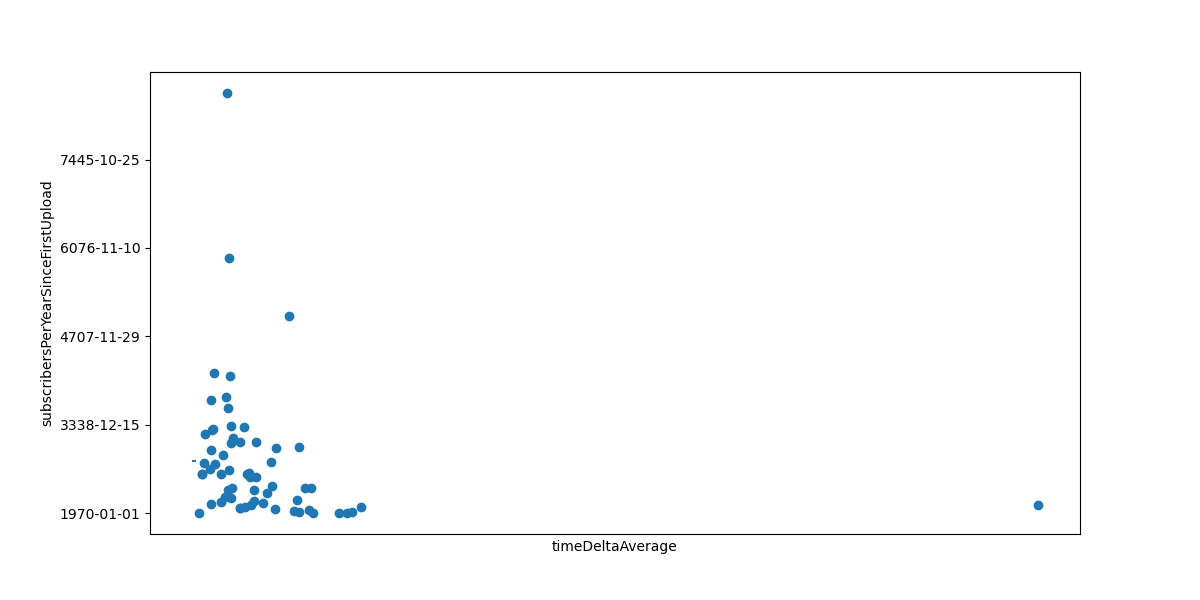

-0.18777578840262987


In [45]:
import mplcursors
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib

x_name = "timeDeltaAverage"
y_name = "subscribersPerYearSinceFirstUpload" 
tooltip_name = "channelName"
tt=channelHolisticInfo[tooltip_name]
x= [float(strpFromTimeDelta(i)) for i in channelHolisticInfo[x_name]]
y=channelHolisticInfo[y_name]
zipped = zip(x, y)

# tt = df[tooltip_name]

fig, ax = plt.subplots(1, figsize=(12,6))

ax.xaxis.set_major_formatter(formatter)
# this locates y-ticks at the hours
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=3600))
# this ensures each bar has a 'date' label

sc = ax.scatter(x, y)
# Plot the average line
avg_score= np.mean([i for i in y])
mean_x=np.arange(0,61,1)
mean_y=[avg_score for i in np.zeros_like(channelInfo_master_df['subscribersPerYearSinceFirstUpload'])]
mean_line = ax.plot(mean_x,mean_y, label='Mean', linestyle='--')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
cursor = mplcursors.cursor(sc, hover=True)
cursor.connect(
    "add", lambda sel: sel.annotation.set_text(tt[sel.index]))
plt.xlabel(x_name)
plt.ylabel(y_name)
ax.yaxis.set_major_formatter(formatter)
plt.show()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.array(x) + b)
result = scipy.stats.linregress(x, y)
print(result.rvalue)

-0.29437080120018094
-0.21881493126249799
-0.3362478410247517


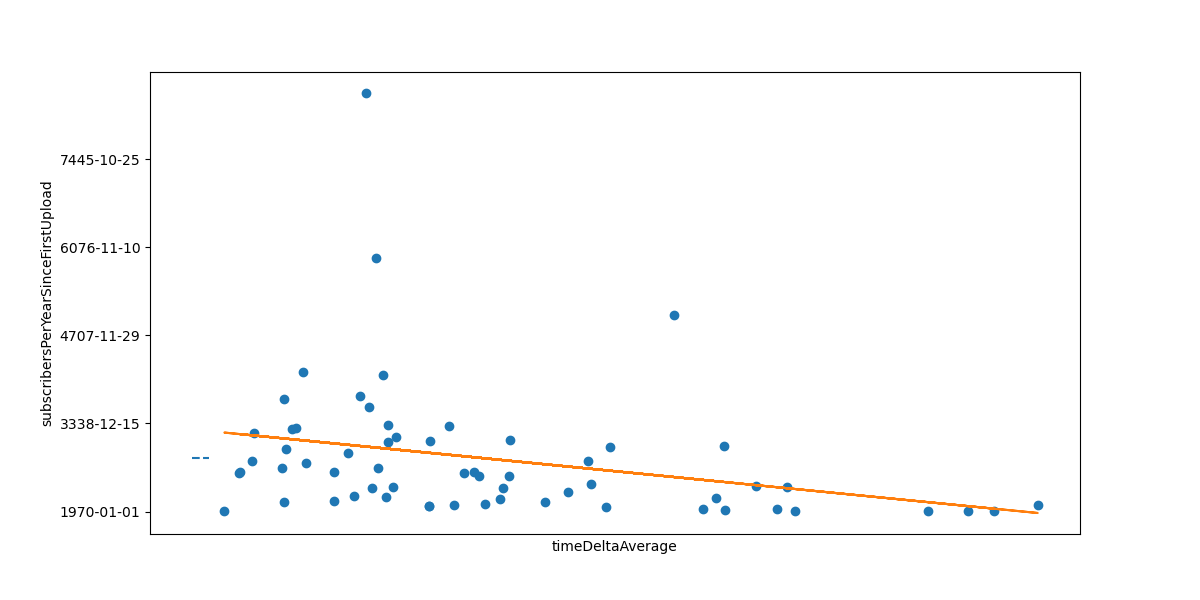

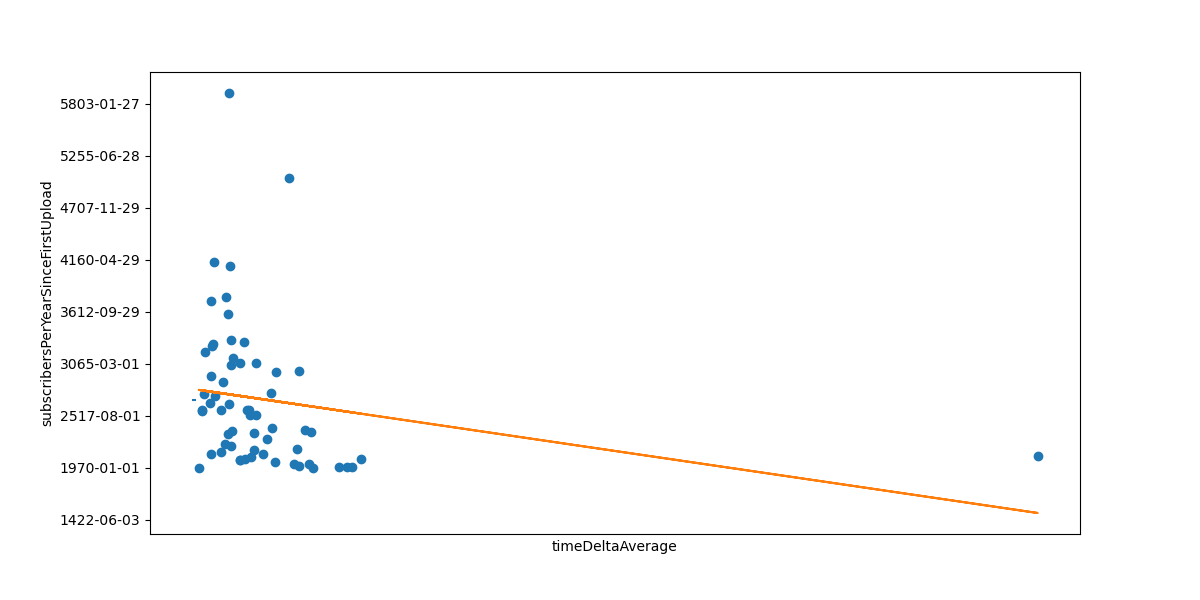

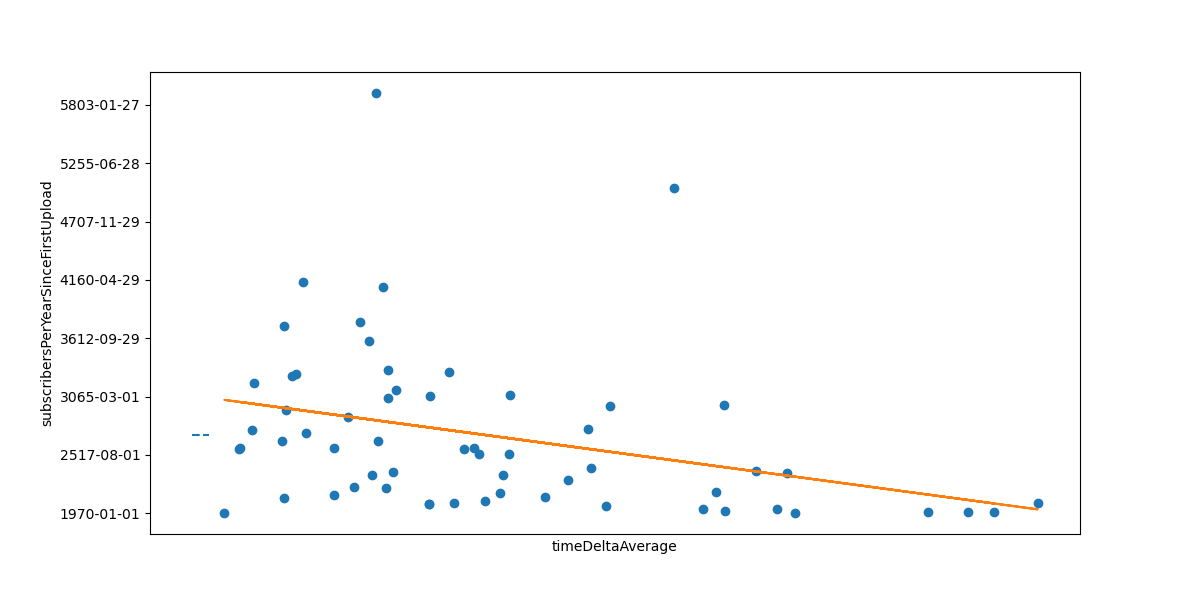

In [47]:
import mplcursors
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib

without_updateDelta_outlier = channelHolisticInfo.drop('42')
without_sub_outlier = channelHolisticInfo.drop(['29'])
without_updateDelta_and_sub_outlier = channelHolisticInfo.drop(['42', '29'])
def timeDeltaAverageToSubCount(df):
    x_name = "timeDeltaAverage"
    y_name = "subscribersPerYearSinceFirstUpload" 
    tooltip_name = "channelName"
    tt=df[tooltip_name]
    x= [float(strpFromTimeDelta(i)) for i in df[x_name]]
    y=df[y_name]
    zipped = zip(x, y)

    # tt = df[tooltip_name]

    fig, ax = plt.subplots(1, figsize=(12,6))

    ax.xaxis.set_major_formatter(formatter)
    # this locates y-ticks at the hours
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=3600))
    # this ensures each bar has a 'date' label

    sc = ax.scatter(x, y)
    # Plot the average line
    avg_score= np.mean([i for i in y])
    mean_x=np.arange(0,61,1)
    mean_y=[avg_score for i in np.zeros_like(channelInfo_master_df['subscribersPerYearSinceFirstUpload'])]
    mean_line = ax.plot(mean_x,mean_y, label='Mean', linestyle='--')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    cursor = mplcursors.cursor(sc, hover=True)
    cursor.connect(
        "add", lambda sel: sel.annotation.set_text(tt[sel.index]))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    ax.yaxis.set_major_formatter(formatter)
    # plt.show()
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*np.array(x) + b)
    result = scipy.stats.linregress(x, y)
    print(result.rvalue)

timeDeltaAverageToSubCount(without_updateDelta_outlier)
timeDeltaAverageToSubCount(without_sub_outlier)
timeDeltaAverageToSubCount(without_updateDelta_and_sub_outlier)